# **Business Context and Problem Definition**

## Business Context

With the increasing popularity and ease of access to online hotel booking platforms, customers tend to make reservations in advance to avoid any last-minute rush and higher prices. These online platforms offer flexible cancellation options, in some cases even a day before reservation. To compete with this, even offline bookings have increased the flexibility in cancellations. This has led to an increase in the growing number of cancellations, with one of the primary reasons being last-minute changes in travel plans. These sudden changes can result from unforeseen circumstances, such as personal emergencies, flight delays, or unexpected events at the travel destination.

Hotel booking cancellations become a crucial problem to solve as it leads to revenue loss and operational inefficiencies. The cancellation of bookings impacts a hotel on various fronts:

1. Loss of revenue when the hotel cannot resell the room

2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms

3. Lowering prices last minute, so the hotel can resell a room, resulting in reduced profit margins

### LIBRARY IMPORTATION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV





import warnings
warnings.filterwarnings('ignore')


### LOAD THE DATA

In [2]:
## LOAD THE DATA

past_data = pd.read_csv(r'C:\Users\AVIRAL\SL2\INNHotelsGroup_pastdata.csv')
new_data = pd.read_csv(r'C:\Users\AVIRAL\SL2\INNHotelsGroup_newdata.csv')

In [3]:
past_data.head(2)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status,rebooked
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled,NaN
1,INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled,NaN


In [4]:
new_data.head(2)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_128127,4,Online,1,103.0,1,0,2022-07-01,1,1,Not Canceled
1,INNHG_128128,147,Online,2,103.7,2,2,2022-07-01,0,2,Not Canceled


#### LETS UNDERSTANND HOW MANY BOOKINGS WERE CANCELLED AND REBOOKED IN LAST MINUTE FROM JAN-21 TO JUN-22

In [5]:
# LETS SEE HOW MANY BOOKINGS WERE CANCELLED ON LAST MOMENT
past_data['booking_status'].value_counts(normalize = True)

booking_status
Not Canceled    0.673089
Canceled        0.326911
Name: proportion, dtype: float64

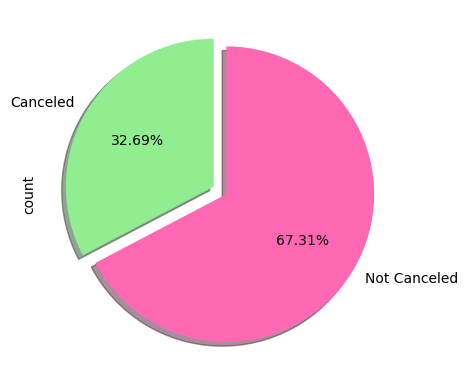

In [6]:
past_data['booking_status'].value_counts().plot(kind = 'pie', colors = ['hotpink', 'lightgreen'], autopct = '%.2f%%', counterclock = False,
                                               startangle = 90, explode = [0,0.1], shadow = True)
plt.show()

In [7]:
# LETS SEE OUT OF CANCELLED BOOKINGS HOW MANY WERE REBOOKED

past_data[past_data['booking_status'] == 'Canceled']['rebooked'].value_counts(normalize = True)

rebooked
No     0.800723
Yes    0.199277
Name: proportion, dtype: float64

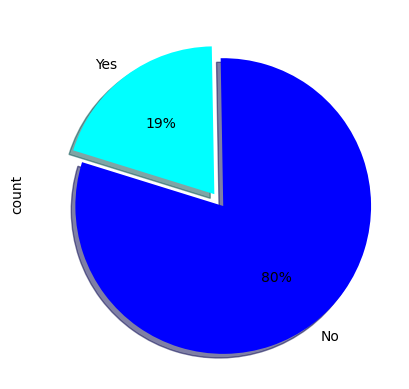

In [8]:
past_data[past_data['booking_status'] == 'Canceled']['rebooked'].value_counts().plot(kind = 'pie', colors = ['blue', 'aqua'], autopct = '%.2d%%',
                                                                                    counterclock = False, startangle = 91,explode = [0.1,0], shadow = True)
plt.show()

INFERENCE :
HERE WE CAN SEE THAT OUT OF ALL THE BOOKINGS ~33% BOOKINGS ARE BEING CANCELLED AT LAST MOMENT AND OUT OF THOSE CANCELLED BOOKINGS ONLY ~20% WERE REBOOKED . WHICH LEADS TO HUGE INVENTORY LOSS

In [9]:
# WE CAN REMOVE 'REBOOKED' COLUMN FROM DATA AS THIS INFORMATION WILL NOT BE AVAILABLE BEFOREHAND

past_data.drop(columns = 'rebooked', inplace = True)

In [10]:
past_data.head(1)

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled


In [11]:
#  WE CAN ALSO MAKE BOOKING ID AS INDEX AS THESE ARE JUST UNIQUE IDENTIFIERS

past_data.set_index('booking_id', inplace = True)
new_data.set_index('booking_id', inplace = True)

In [12]:
past_data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_101034,0,Online,0,85.03,1,1,2021-01-01,0,0,Not Canceled
INNHG_101035,34,Online,2,125.10,2,2,2021-01-01,0,0,Not Canceled
INNHG_101036,24,Online,1,71.69,2,2,2021-01-01,0,0,Not Canceled
INNHG_101037,23,Online,0,84.70,1,2,2021-01-01,0,0,Not Canceled
INNHG_101038,46,Online,1,149.40,2,2,2021-01-01,0,3,Canceled


In [13]:
new_data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_128127,4,Online,1,103.00,1,0,2022-07-01,1,1,Not Canceled
INNHG_128128,147,Online,2,103.70,2,2,2022-07-01,0,2,Not Canceled
INNHG_128129,43,Online,1,126.90,2,1,2022-07-01,1,2,Not Canceled
INNHG_128130,145,Offline,0,72.76,2,0,2022-07-01,0,1,Not Canceled
INNHG_128131,86,Offline,1,107.69,2,1,2022-07-01,0,2,Not Canceled


### EXPLORE THE DATA

In [14]:
print(f'NO OF ROWS : {past_data.shape[0]}')
print(f'NO OF ROWS : {past_data.shape[1]}')

NO OF ROWS : 27093
NO OF ROWS : 10


In [15]:
# CHECK THE BALANCE OF TARGET VARIABLE 
past_data['booking_status'].value_counts(normalize = True)

booking_status
Not Canceled    0.673089
Canceled        0.326911
Name: proportion, dtype: float64

In [16]:
# 5 POINT SUMMARY
past_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


In [17]:
past_data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'arrival_date', 'required_car_parking_space', 'no_of_week_nights',
       'booking_status'],
      dtype='object')

In [18]:
# EXPLORE THE COLUMN ONE BY ONE

num_cols = ['lead_time','avg_price_per_room','no_of_week_nights']
cat_cols = ['market_segment_type', 'no_of_special_requests','no_of_adults', 'no_of_weekend_nights',
        'required_car_parking_space',
       'booking_status']

### UNIVARIATE ANALYSIS

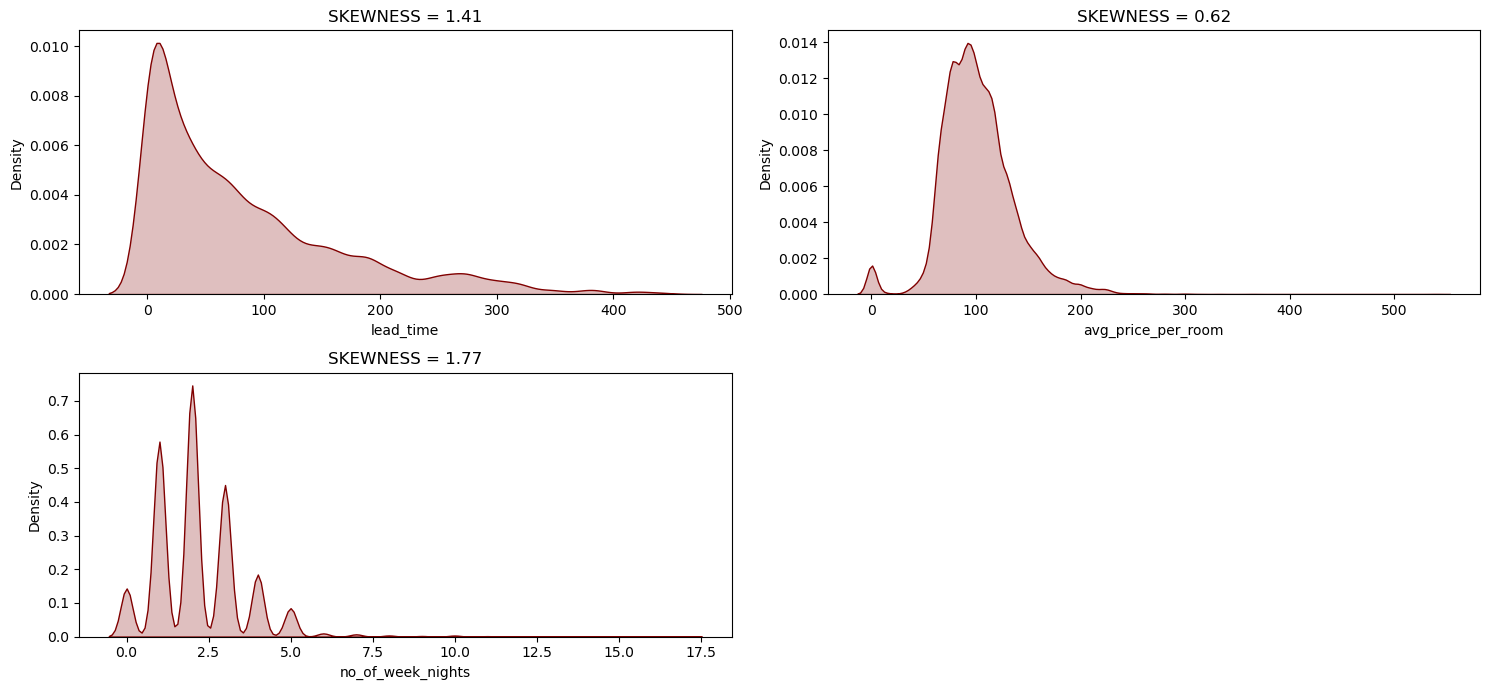

In [19]:
t = 1
plt.figure(figsize = (15,7))
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'SKEWNESS = {round(past_data[i].skew(),2)}')
    sns.kdeplot(data = past_data, x = i, fill = True, color = 'maroon')
    t = t + 1

plt.tight_layout()
plt.show()

INFERENCE

* LEAD TIME IS EXCEEDING 300 DAYS!!! ARE THERE BOOKINGS WHERE HAVE BEEN MADE 1 YEAR PRIOR?

* THERE ARE BOOKINGS WITH AVG PRICE PER ROOM 0.

* THERE ARE CUSTOMERS WITH VERY LONG STAYS UPTO 17 WEEKNIGHTS.


In [20]:
past_data[past_data['avg_price_per_room']== 0]

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_101089,9,Online,2,0.0,2,1,2021-01-01,0,0,Not Canceled
INNHG_101119,24,Online,1,0.0,2,1,2021-01-01,0,0,Not Canceled
INNHG_101140,145,Online,1,0.0,2,0,2021-01-05,0,0,Not Canceled
INNHG_101150,4,Online,1,0.0,1,0,2021-01-05,0,1,Not Canceled
INNHG_101179,145,Online,1,0.0,2,0,2021-01-05,0,0,Not Canceled
...,...,...,...,...,...,...,...,...,...,...
INNHG_127432,3,Online,0,0.0,2,0,2022-06-24,0,0,Not Canceled
INNHG_127463,0,Online,0,0.0,1,0,2022-06-24,0,2,Not Canceled
INNHG_127773,3,Online,0,0.0,1,1,2022-06-27,0,0,Not Canceled


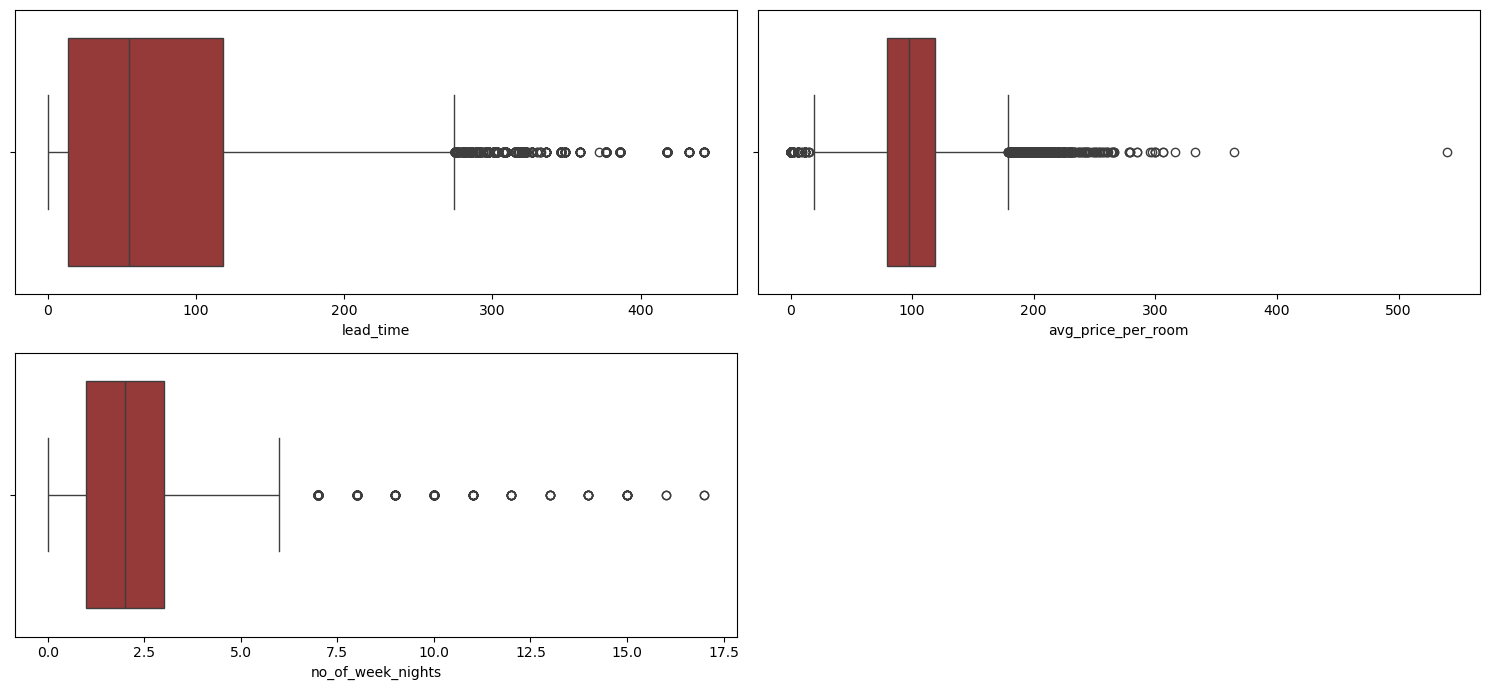

In [21]:
t = 1
plt.figure(figsize = (15,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data = past_data, x = i, fill = True, color = 'brown')
    t = t + 1

plt.tight_layout()
plt.show()

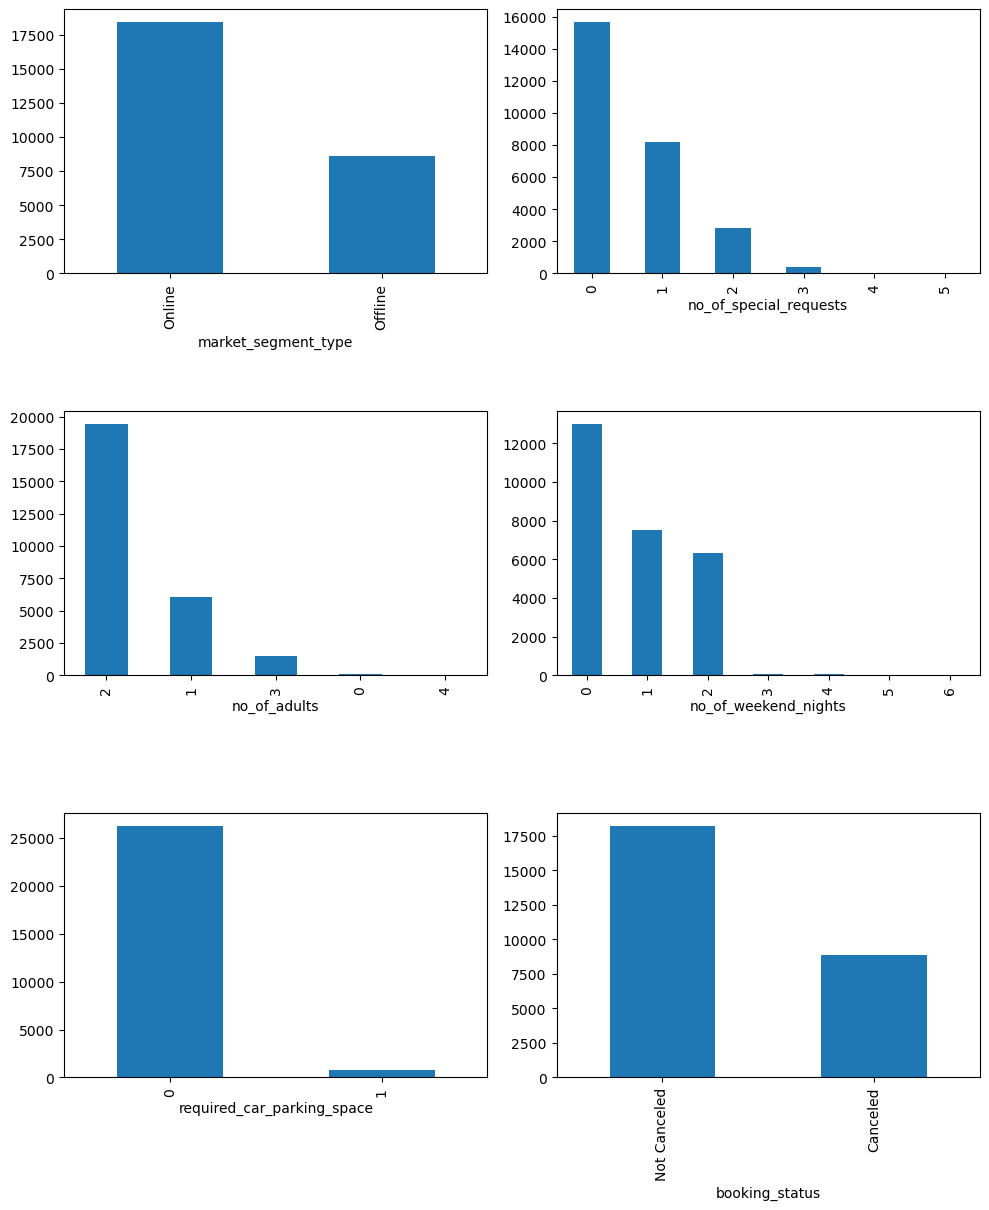

In [22]:
# lETS EXPLORE CATEGORY COLUMNS 

t = 1
plt.figure(figsize = (10,15))
for i in cat_cols:
    plt.subplot(4,2,t)
    past_data[i].value_counts().plot(kind = 'bar')
    t = t+1

plt.tight_layout()
plt.show()

INFERENCE

* MOST OF THE BOOKINGS HAVE BEEN ONLINE
* MOSTLY THERE ARE NO OR 1 SPECIAL REQUESTS
* IN MOST OF THE BOOKINGS NO. OF ADULTS ARE 1 OR 2
* IN MOST OF THE BOOKINGS MAX WEEKEND NIGHTS ARE 2
* IN MOST OF THE BOOKINGS DO NOT REQ PARKING SPACE

### BIVARIATE ANALYSIS

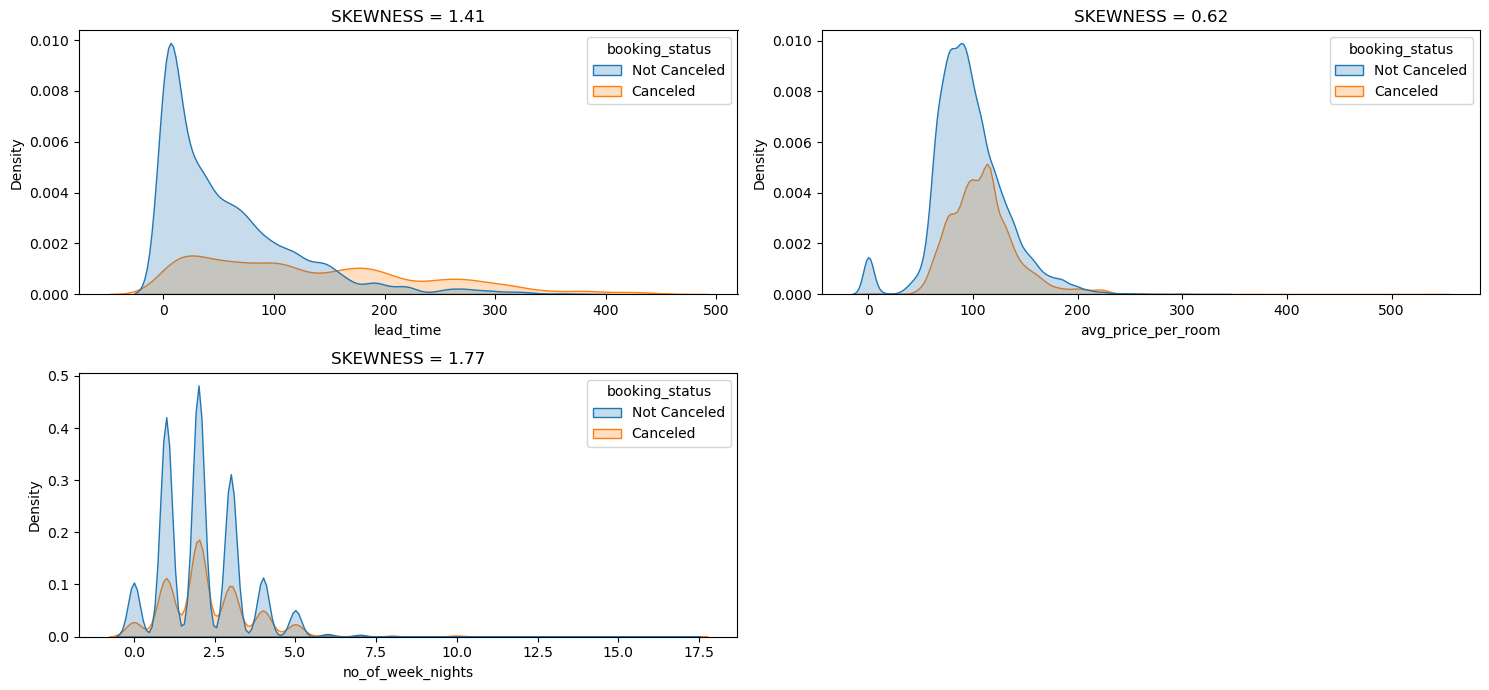

In [23]:
# Lets make kde plot

t = 1
plt.figure(figsize = (15,7))
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'SKEWNESS = {round(past_data[i].skew(),2)}')
    sns.kdeplot(data = past_data, x = i, fill = True, color = 'lime', hue = 'booking_status')
    t = t + 1

plt.tight_layout()
plt.show()

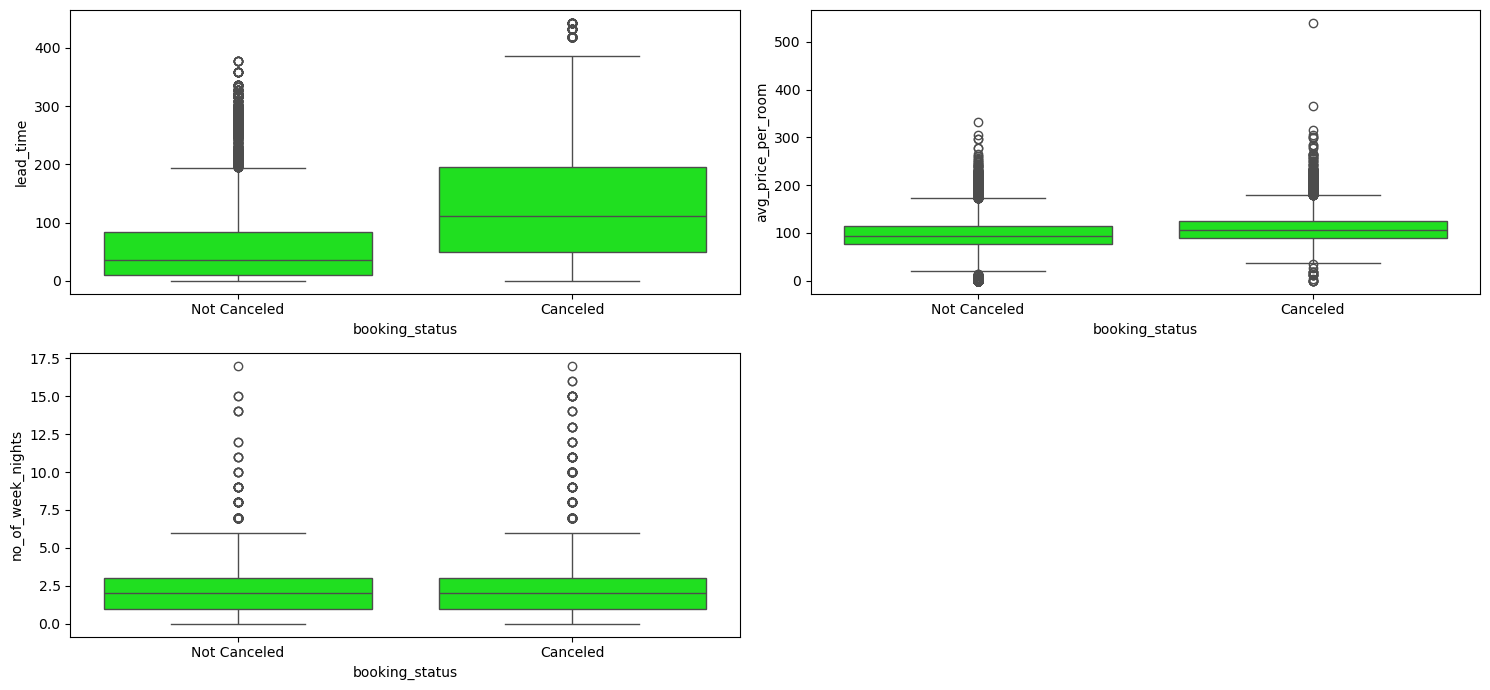

In [24]:
# LETS MAKE BOX PLOT BETWEEN CAT-NUM COLS


t = 1
plt.figure(figsize = (15,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data = past_data,x = 'booking_status', y = i, fill = True, color = 'lime')
    t = t + 1

plt.tight_layout()
plt.show()

In [25]:
# LETS INVESTIGATE LEAD_TIME AND AVG_PRICE_PER_ROOM WITH BOOKING STATUS

past_data.groupby(by = 'booking_status')['lead_time'].mean()

booking_status
Canceled        134.035791
Not Canceled     56.140382
Name: lead_time, dtype: float64

In [26]:
samp1 = past_data[past_data['booking_status'] == 'Canceled']['lead_time']
samp2 = past_data[past_data['booking_status'] == 'Not Canceled']['lead_time']

In [27]:
# WE WILL GO WITH 2 SAMPLE T-TEST

# Assumption 1 : Data must be Normal

print(stats.shapiro(samp1))
print(stats.shapiro(samp2))


# Assumption 2 : Data have equal variances

print(stats.levene(samp1,samp2))

ShapiroResult(statistic=0.9387743609879114, pvalue=4.865435517353332e-51)
ShapiroResult(statistic=0.8214888949700189, pvalue=7.235137959871973e-88)
LeveneResult(statistic=3210.120590252021, pvalue=0.0)


In [28]:
# MANNWHITNEYU TEST

pval = stats.mannwhitneyu(samp1, samp2, alternative= 'greater')[1]

if pval < 0.05:
    print('REJECT NULL HYPOTHESIS')
else:
    print('FAIL TO REJECT NULL HYPOTHESIS')

REJECT NULL HYPOTHESIS


In [29]:
# LETS INVESTIGATE AVG_PRICE_PER_ROOM WITH BOOKING STATUS
past_data.groupby(by = 'booking_status')['avg_price_per_room'].mean()

booking_status
Canceled        109.722152
Not Canceled     96.802253
Name: avg_price_per_room, dtype: float64

In [30]:
samp1 = past_data[past_data['booking_status'] == 'Canceled']['avg_price_per_room']
samp2 = past_data[past_data['booking_status'] == 'Not Canceled']['avg_price_per_room']

In [31]:
# WE WILL GO WITH 2 SAMPLE T-TEST

# Assumption 1 : Data must be Normal

print(stats.shapiro(samp1))
print(stats.shapiro(samp2))


# Assumption 2 : Data have equal variances

print(stats.levene(samp1,samp2))

ShapiroResult(statistic=0.9253871055438694, pvalue=1.5094155400796404e-54)
ShapiroResult(statistic=0.9534249109201302, pvalue=3.2212372568679052e-59)
LeveneResult(statistic=29.227364523829735, pvalue=6.490728476679038e-08)


In [32]:
# MANNWHITNEYU TEST

pval = stats.mannwhitneyu(samp1, samp2, alternative= 'greater')[1]

if pval < 0.05:
    print('REJECT NULL HYPOTHESIS')
else:
    print('FAIL TO REJECT NULL HYPOTHESIS')

REJECT NULL HYPOTHESIS


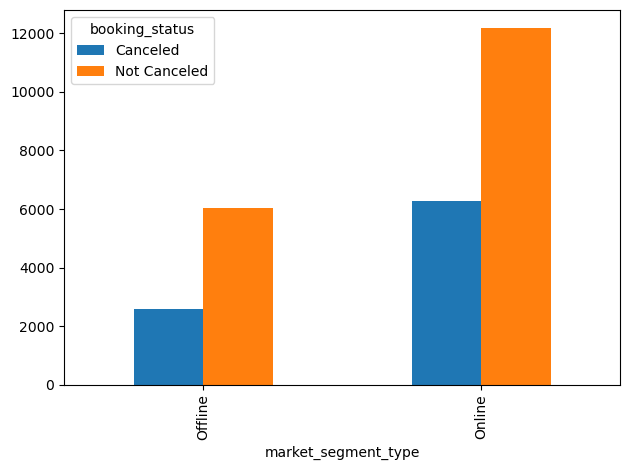

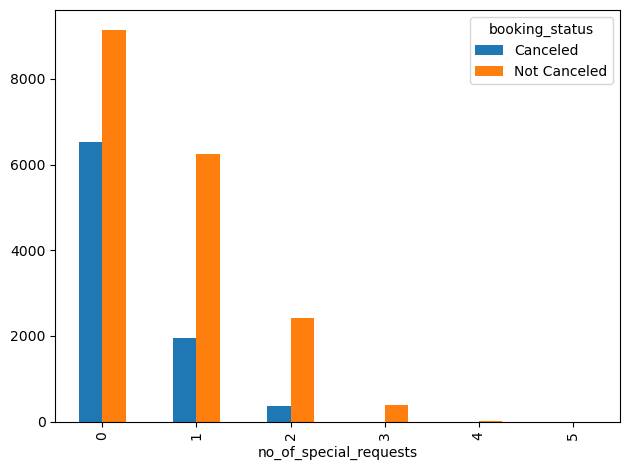

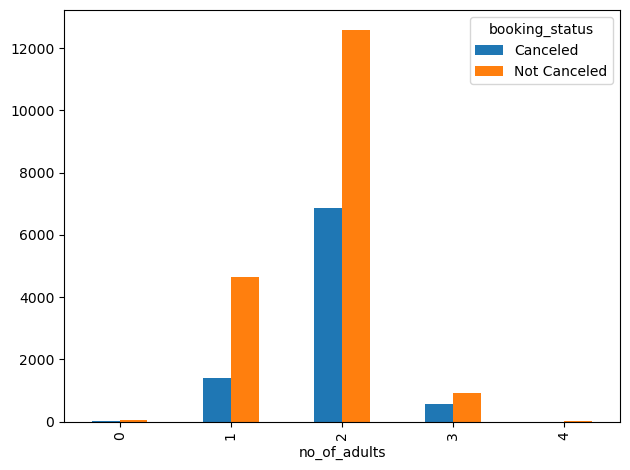

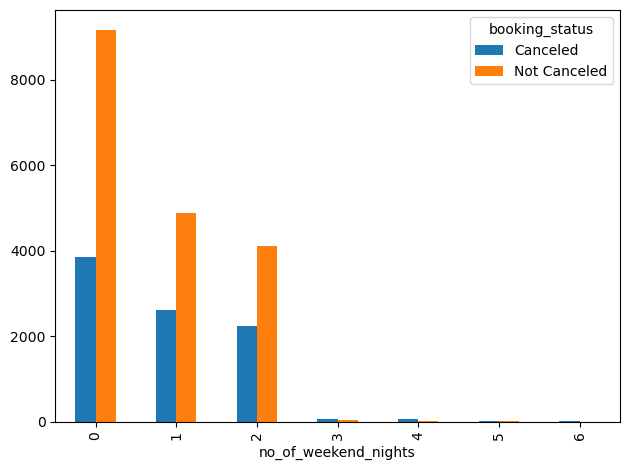

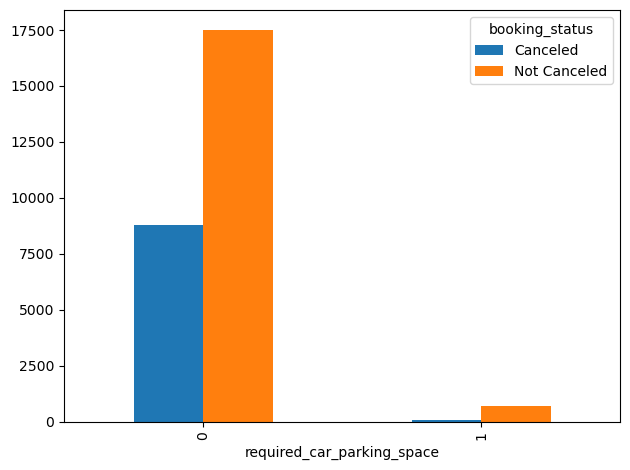

<Figure size 640x480 with 0 Axes>

In [33]:
# CAT COLUMNS V/S TARGET VARIABLE

for i in cat_cols:
    if i != 'booking_status':
        
        pd.crosstab(past_data[i], past_data['booking_status']).plot(kind = 'bar')
    plt.tight_layout()
    plt.show()

In [34]:
# LETS DO CHI_SQ_CONTINGENCY TEST TO MAKE FINAL CONCLUSIONS

Ho = 'Columns are Independent'
Ha = 'Columns are dependent'

for i in cat_cols:
    if i != 'booking_status':
        contingency_table = pd.crosstab(past_data[i], past_data['booking_status'])
        print(i,':',stats.chi2_contingency(contingency_table)[1])



market_segment_type : 7.806389643886697e-11
no_of_special_requests : 0.0
no_of_adults : 1.4411855115006094e-73
no_of_weekend_nights : 5.324997086476798e-43
required_car_parking_space : 5.626905783478662e-49


INFERENCE

* TARGET VARIABLE IS AFFECTED BY ALL COLUMNS

#### (JUST FOR REFRENCE)

Inferential Statistics(Num V/S Num)

In [35]:
past_data['lead_time'].corr(past_data['avg_price_per_room'])

-0.029289187268519836

In [36]:
# Parametric test (Pearsons correlation test)

# Ho- No correlation 
# Ha- Correlation 

# Assumption: Data must be normal 
stats.pearsonr(past_data['lead_time'], past_data['avg_price_per_room'])

PearsonRResult(statistic=-0.029289187268519874, pvalue=1.4227003552821461e-06)

In [37]:
# Non- Parametric test (Spearman's correlation test)

# Ho- No correlation 
# Ha- Correlation 

# Assumption: Data must be normal 
stats.spearmanr(past_data['lead_time'], past_data['avg_price_per_room'])

SignificanceResult(statistic=0.00683549727618094, pvalue=0.26055481328066965)

## **DATA PREPROCESSING**

### DUPLICATES

In [38]:
# Check for Duplicates

past_data.duplicated().sum()

8438

### MISSING VALUES

In [39]:
# CHECK FOR MISSING VALUES 

past_data.isnull().sum()

lead_time                     0
market_segment_type           0
no_of_special_requests        0
avg_price_per_room            0
no_of_adults                  0
no_of_weekend_nights          0
arrival_date                  0
required_car_parking_space    0
no_of_week_nights             0
booking_status                0
dtype: int64

In [40]:

new_data.isnull().sum()

lead_time                     0
market_segment_type           0
no_of_special_requests        0
avg_price_per_room            0
no_of_adults                  0
no_of_weekend_nights          0
arrival_date                  0
required_car_parking_space    0
no_of_week_nights             0
booking_status                0
dtype: int64

### OUTLIERS


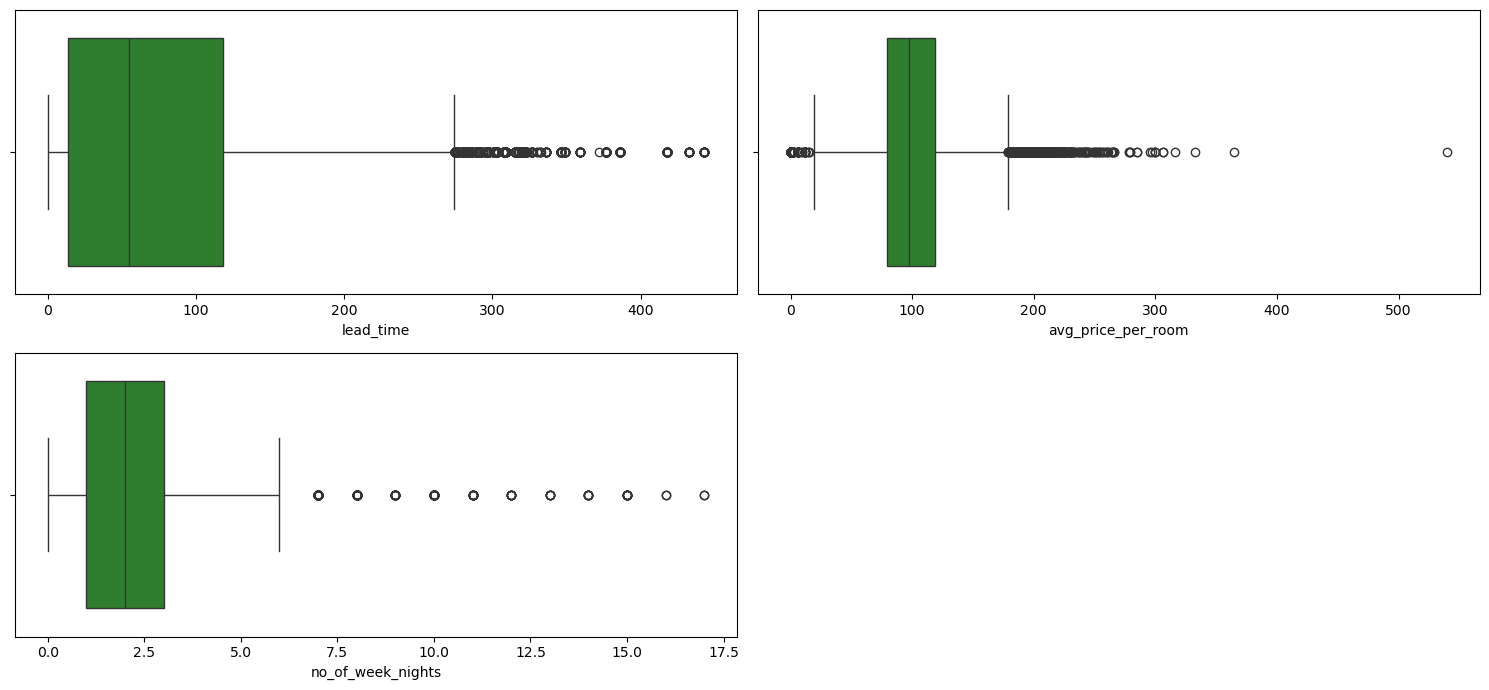

In [41]:
t = 1
plt.figure(figsize = (15,7))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data = past_data, x = i, fill = True, color = 'forestgreen')
    t = t + 1

plt.tight_layout()
plt.show()

In [42]:
past_data[past_data['avg_price_per_room'] > 400]

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
booking_id,,,,,,,,,,
INNHG_119173,35,Offline,0,540.0,2,0,2022-03-25,0,1,Canceled


In [43]:
past_data.drop(index = 'INNHG_119173', inplace = True	)

In [44]:
# LETS SPLIT THE DATA INTO TRAIN AND TEST

x_train = past_data.drop(columns = ['booking_status'])
y_train = past_data['booking_status'].map({'Not Canceled' : 0, 'Canceled' : 1})

x_test = new_data.drop(columns = ['booking_status'])
y_test = new_data['booking_status'].map({'Not Canceled' : 0, 'Canceled' : 1})

In [45]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(27092, 9) (27092,) (3583, 9) (3583,)


## FEATURE ENCODING

In [46]:
x_train.dtypes

lead_time                       int64
market_segment_type            object
no_of_special_requests          int64
avg_price_per_room            float64
no_of_adults                    int64
no_of_weekend_nights            int64
arrival_date                   object
required_car_parking_space      int64
no_of_week_nights               int64
dtype: object

In [47]:
x_train['market_segment_type'].value_counts()

market_segment_type
Online     18456
Offline     8636
Name: count, dtype: int64

In [48]:
x_train['market_segment_type'] = x_train['market_segment_type'].map({'Online' : 1, 'Offline' : 0})

In [49]:
x_train['market_segment_type'].value_counts()

market_segment_type
1    18456
0     8636
Name: count, dtype: int64

In [50]:
x_test['market_segment_type'] = x_test['market_segment_type'].map({'Online' : 1, 'Offline' : 0})

In [51]:
x_test['market_segment_type'].value_counts()

market_segment_type
1    3105
0     478
Name: count, dtype: int64

### FEATURE ENGINEERING

In [52]:
x_train['arrival_date'] = pd.to_datetime(x_train['arrival_date'])
x_test['arrival_date'] = pd.to_datetime(x_test['arrival_date'])

In [53]:
x_train['arrival_weekday'] = x_train['arrival_date'].dt.weekday
x_train['arrival_month'] = x_train['arrival_date'].dt.month
x_train['arrival_day'] = x_train['arrival_date'].dt.day

In [54]:
x_test['arrival_weekday'] = x_test['arrival_date'].dt.weekday
x_test['arrival_month'] = x_test['arrival_date'].dt.month
x_test['arrival_day'] = x_test['arrival_date'].dt.day

In [55]:
x_train.drop(columns = 'arrival_date', inplace = True)
x_test.drop(columns = 'arrival_date', inplace = True)

## FEATURE TRANSFORMATION

-  LETS USE YEO - JOHNSON TRANSFORMATION ON NUMERIC COLUMNS
-  THIS WAY THE MODEL WILL FIT BETTER AND EFFECT OF OUTLIER WILL ALSO REDUCE 

In [56]:
pt = PowerTransformer(standardize=False)

x_train[['lead_time', 'avg_price_per_room']] = pt.fit_transform(x_train[['lead_time', 'avg_price_per_room']])
x_test[['lead_time', 'avg_price_per_room']] = pt.transform(x_test[['lead_time', 'avg_price_per_room']])

In [57]:
x_train.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_weekday,arrival_month,arrival_day
booking_id,,,,,,,,,,,
INNHG_101034,0.000000,1,0,56.295048,1,1,0,0,4,1,1
INNHG_101035,5.761007,1,2,79.293092,2,2,0,0,4,1,1


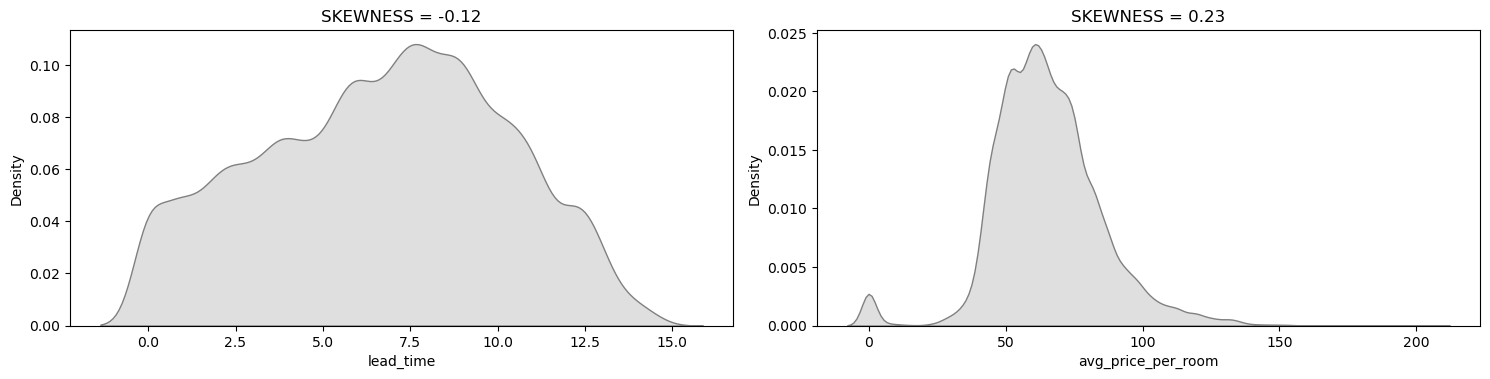

In [58]:
t = 1
plt.figure(figsize = (15,7))
for i in ['lead_time', 'avg_price_per_room']:
    plt.subplot(2,2,t)
    plt.title(f'SKEWNESS = {round(x_train[i].skew(),2)}')
    sns.kdeplot(data = x_train, x = i, fill = True, color = 'grey')
    t = t + 1

plt.tight_layout()
plt.show()

## **MODELLING**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,cohen_kappa_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)

In [60]:
# CREATE A FUNCTION TO VALIDATE MODEL
acu = []
rec = []
m = []
pre = []
f1 = []
kap = []
def model_validation(model, xtrain, ytrain, xtest, ytest):
    mod = model
    mod.fit(xtrain, ytrain)
    pred_s = mod.predict_proba(xtest)[:,1]
    pred_h = mod.predict(xtest)



    print(confusion_matrix(ytest, pred_h))
    print(classification_report(ytest, pred_h))


    fpr,tpr, thres = roc_curve(ytest, pred_s)
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1], color = 'tomato', ls = '--')
    plt.title(f'ROC-AUC : {round(roc_auc_score(ytest, pred_s),3)}')
    plt.show()


    response = input('DO YOU WANT TO SAVE THIS MODEL ? (Y/N)')
    if response.lower() == 'y':
        global scorecard
        m.append(str(model))
        acu.append(accuracy_score(ytest, pred_h))
        rec.append(recall_score(ytest, pred_h))
        pre.append(precision_score(ytest, pred_h))
        f1.append(f1_score(ytest, pred_h))
        kap.append(cohen_kappa_score(ytest, pred_h))

        
        scorecard = pd.DataFrame({'Model' : m, 'Accuracy' : acu, 'Recall' : rec, 'Precision' : pre, 'F1 Score' : f1, 'Cohen-Kappa-Scorecard' : kap})

    else:
        return

#### LOGISTIC REGRESSION

[[1642  741]
 [ 267  933]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      2383
           1       0.56      0.78      0.65      1200

    accuracy                           0.72      3583
   macro avg       0.71      0.73      0.71      3583
weighted avg       0.76      0.72      0.73      3583



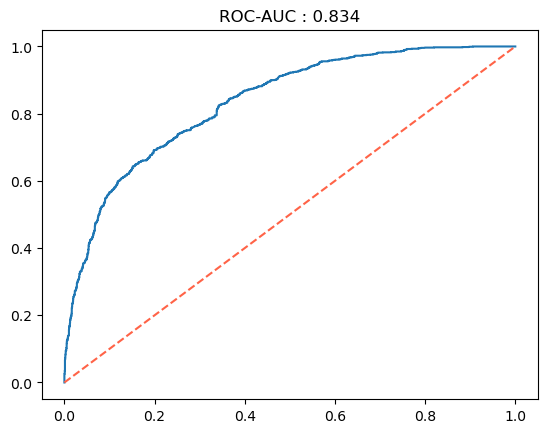

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [61]:
model_validation(model = LogisticRegression(class_weight='balanced'), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest = y_test)

In [62]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.7775,0.557348,0.649269,0.424889


#### NAIVE BAYES

[[1782  601]
 [ 445  755]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      2383
           1       0.56      0.63      0.59      1200

    accuracy                           0.71      3583
   macro avg       0.68      0.69      0.68      3583
weighted avg       0.72      0.71      0.71      3583



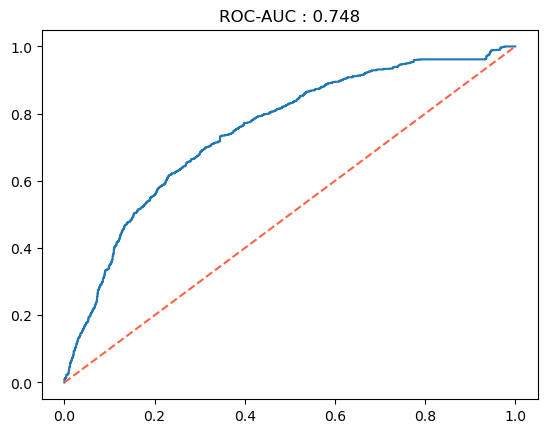

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [63]:
model_validation(model = GaussianNB(), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest =y_test )

In [64]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180


[[2281  102]
 [ 911  289]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      2383
           1       0.74      0.24      0.36      1200

    accuracy                           0.72      3583
   macro avg       0.73      0.60      0.59      3583
weighted avg       0.72      0.72      0.67      3583



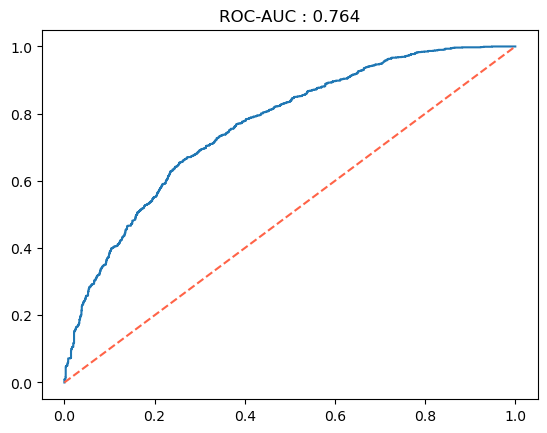

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [65]:
model_validation(model = MultinomialNB(), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest =y_test )

In [66]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180
2,MultinomialNB(),0.717276,0.240833,0.739130,0.363294,0.237828


#### DECISION TREE 

[[2158  225]
 [ 355  845]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2383
           1       0.79      0.70      0.74      1200

    accuracy                           0.84      3583
   macro avg       0.82      0.80      0.81      3583
weighted avg       0.84      0.84      0.84      3583



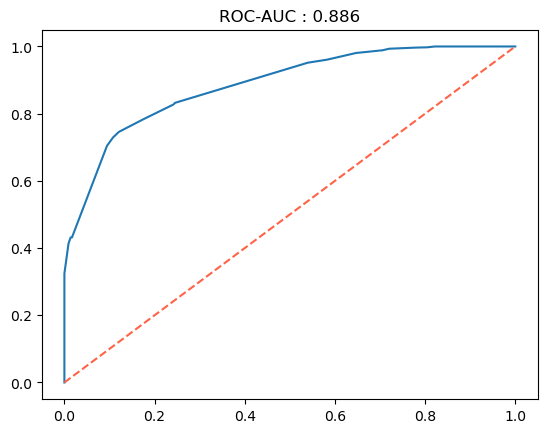

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [67]:
model_validation(model = DecisionTreeClassifier(max_depth = 5), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest =y_test )

In [68]:
# FINE TUNE DT

grid = {'max_depth' : [4,5,6,7,8,9],
       'max_leaf_nodes' : [13,15,17,19,21]}

gscv = GridSearchCV(estimator = DecisionTreeClassifier(), cv = 5, scoring = 'roc_auc', verbose = 3, param_grid = grid)

In [69]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....max_depth=4, max_leaf_nodes=13;, score=0.858 total time=   0.0s
[CV 2/5] END ....max_depth=4, max_leaf_nodes=13;, score=0.801 total time=   0.0s
[CV 3/5] END ....max_depth=4, max_leaf_nodes=13;, score=0.552 total time=   0.0s
[CV 4/5] END ....max_depth=4, max_leaf_nodes=13;, score=0.810 total time=   0.0s
[CV 5/5] END ....max_depth=4, max_leaf_nodes=13;, score=0.816 total time=   0.0s
[CV 1/5] END ....max_depth=4, max_leaf_nodes=15;, score=0.861 total time=   0.0s
[CV 2/5] END ....max_depth=4, max_leaf_nodes=15;, score=0.808 total time=   0.0s
[CV 3/5] END ....max_depth=4, max_leaf_nodes=15;, score=0.559 total time=   0.0s
[CV 4/5] END ....max_depth=4, max_leaf_nodes=15;, score=0.811 total time=   0.0s
[CV 5/5] END ....max_depth=4, max_leaf_nodes=15;, score=0.816 total time=   0.0s
[CV 1/5] END ....max_depth=4, max_leaf_nodes=17;, score=0.861 total time=   0.0s
[CV 2/5] END ....max_depth=4, max_leaf_nodes=17

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [13, 15, 17, 19, 21]},
             scoring='roc_auc', verbose=3)

In [70]:
gscv.best_params_

{'max_depth': 6, 'max_leaf_nodes': 21}

In [71]:
gscv.best_score_

0.7893700870339794

[[2099  284]
 [ 318  882]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2383
           1       0.76      0.73      0.75      1200

    accuracy                           0.83      3583
   macro avg       0.81      0.81      0.81      3583
weighted avg       0.83      0.83      0.83      3583



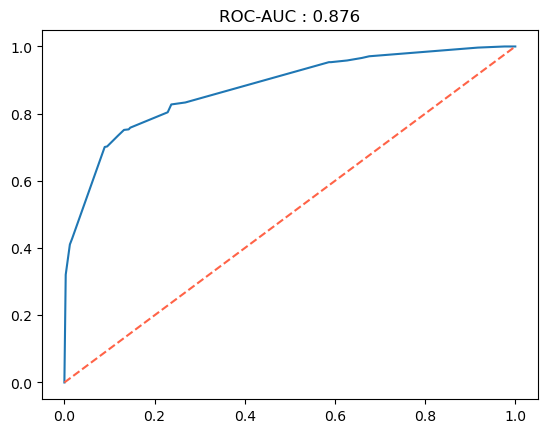

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [72]:
model_validation(model = DecisionTreeClassifier(**gscv.best_params_), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest =y_test )

In [73]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180
2,MultinomialNB(),0.717276,0.240833,0.739130,0.363294,0.237828
3,DecisionTreeClassifier(max_depth=5),0.838124,0.704167,0.789720,0.744493,0.626597
4,"DecisionTreeClassifier(max_depth=6, max_leaf_n...",0.831984,0.735000,0.756432,0.745562,0.620184


#### RANDOM FOREST

In [74]:
grid = {'n_estimators' : [90,100,110,120], 'max_depth' : [8,9,10]} 

gscv = GridSearchCV(estimator = RandomForestClassifier(), cv = 5, verbose = 2, scoring = 'roc_auc', param_grid = grid)

In [75]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......................max_depth=8, n_estimators=90; total time=   0.7s
[CV] END .......................max_depth=8, n_estimators=90; total time=   0.7s
[CV] END .......................max_depth=8, n_estimators=90; total time=   0.7s
[CV] END .......................max_depth=8, n_estimators=90; total time=   0.7s
[CV] END .......................max_depth=8, n_estimators=90; total time=   0.7s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=8, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=8, n_estimators=110; total time=   0.9s
[CV] END ......................max_depth=8, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'n_estimators': [90, 100, 110, 120]},
             scoring='roc_auc', verbose=2)

In [76]:
gscv.best_params_

{'max_depth': 8, 'n_estimators': 100}

[[2265  118]
 [ 418  782]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2383
           1       0.87      0.65      0.74      1200

    accuracy                           0.85      3583
   macro avg       0.86      0.80      0.82      3583
weighted avg       0.85      0.85      0.84      3583



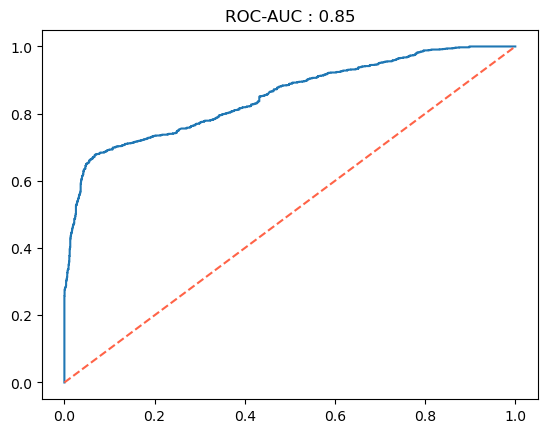

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [77]:
model_validation(model = RandomForestClassifier(**gscv.best_params_), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest =y_test )

In [78]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180
2,MultinomialNB(),0.717276,0.240833,0.739130,0.363294,0.237828
3,DecisionTreeClassifier(max_depth=5),0.838124,0.704167,0.789720,0.744493,0.626597
4,"DecisionTreeClassifier(max_depth=6, max_leaf_n...",0.831984,0.735000,0.756432,0.745562,0.620184
5,RandomForestClassifier(max_depth=8),0.850405,0.651667,0.868889,0.744762,0.641987


### ADA_BOOST

In [79]:
grid = {'n_estimators' : [70,100,120], 'learning_rate' : [0.1,1]}

gscv = GridSearchCV(estimator= AdaBoostClassifier(), cv = 5, verbose = 3, scoring = 'roc_auc', param_grid = grid)

In [80]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_rate=0.1, n_estimators=70;, score=0.795 total time=   0.6s
[CV 2/5] END learning_rate=0.1, n_estimators=70;, score=0.838 total time=   0.7s
[CV 3/5] END learning_rate=0.1, n_estimators=70;, score=0.651 total time=   0.7s
[CV 4/5] END learning_rate=0.1, n_estimators=70;, score=0.841 total time=   0.6s
[CV 5/5] END learning_rate=0.1, n_estimators=70;, score=0.846 total time=   0.6s
[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.794 total time=   0.9s
[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.807 total time=   1.0s
[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.655 total time=   0.9s
[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.843 total time=   1.0s
[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.856 total time=   1.0s
[CV 1/5] END learning_rate=0.1, n_estimators=120;, score=0.795 total time=   1.0s
[CV 2/5] END learning_rate=0.1, n_estimator

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': [70, 100, 120]},
             scoring='roc_auc', verbose=3)

In [81]:
gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 70}

[[2177  206]
 [ 595  605]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      2383
           1       0.75      0.50      0.60      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.71      0.72      3583
weighted avg       0.77      0.78      0.76      3583



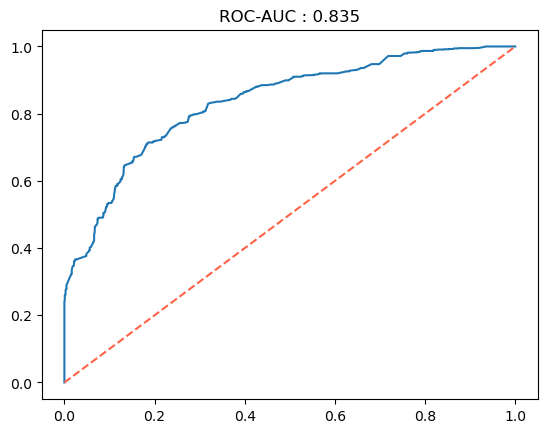

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [82]:
model_validation(model = AdaBoostClassifier(**gscv.best_params_), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest =y_test )

In [83]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180
2,MultinomialNB(),0.717276,0.240833,0.739130,0.363294,0.237828
3,DecisionTreeClassifier(max_depth=5),0.838124,0.704167,0.789720,0.744493,0.626597
4,"DecisionTreeClassifier(max_depth=6, max_leaf_n...",0.831984,0.735000,0.756432,0.745562,0.620184
5,RandomForestClassifier(max_depth=8),0.850405,0.651667,0.868889,0.744762,0.641987
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.776444,0.504167,0.745993,0.601691,0.454273


In [ ]:
model_validation(model = AdaBoostClassifier(estimator = DecisionTreeClassifier(), ), xtrain = x_train, ytrain = y_train, xtest = x_test, ytest =y_test )

### XG BOOST


In [87]:
grid = {'n_estimators' : [70,100,120,150,180],
       'max_depth' : [5,7,9,11]} 

In [92]:
gscv = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.05), verbose = 1, cv = 5, param_grid=grid, scoring = 'roc_auc' )

In [93]:
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.05,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'n_estimators': [70, 100, 120, 150, 180]},
             scoring='roc_auc', verbose=1)

In [94]:
gscv.best_params_

{'max_depth': 5, 'n_estimators': 70}

In [95]:
gscv.best_score_

0.7537506049213228

[[2192  191]
 [ 354  846]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2383
           1       0.82      0.70      0.76      1200

    accuracy                           0.85      3583
   macro avg       0.84      0.81      0.82      3583
weighted avg       0.85      0.85      0.84      3583



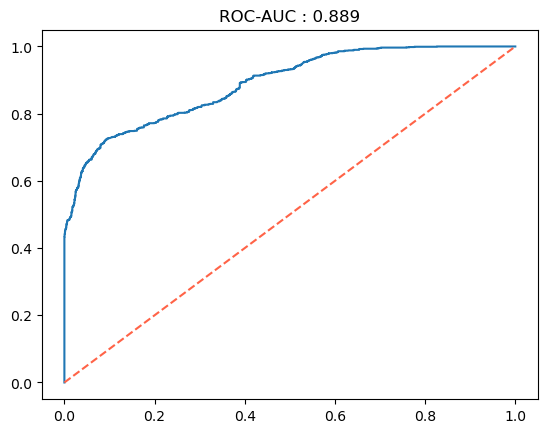

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [99]:
model_validation(XGBClassifier(n_estimator = 70, learning_rate = 0.05, max_depth = 5), x_train, y_train,x_test, y_test)

In [100]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180
2,MultinomialNB(),0.717276,0.240833,0.739130,0.363294,0.237828
3,DecisionTreeClassifier(max_depth=5),0.838124,0.704167,0.789720,0.744493,0.626597
4,"DecisionTreeClassifier(max_depth=6, max_leaf_n...",0.831984,0.735000,0.756432,0.745562,0.620184
5,RandomForestClassifier(max_depth=8),0.850405,0.651667,0.868889,0.744762,0.641987
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.776444,0.504167,0.745993,0.601691,0.454273
7,"XGBClassifier(base_score=None, booster=None, c...",0.803517,0.739167,0.694053,0.715900,0.565957
8,"XGBClassifier(base_score=None, booster=None, c...",0.847893,0.705000,0.815815,0.756370,0.646651


- Lets Check For the variance  in DT and XGB

In [137]:
from sklearn.model_selection import cross_val_score, KFold

In [104]:
scores = cross_val_score(estimator = DecisionTreeClassifier(max_depth = 6), X = x_train, y = y_train, cv = 6, scoring = 'f1')

In [105]:
scores

array([0.75459931, 0.64586236, 0.35772965, 0.35791645, 0.69497569,
       0.49667716])

In [107]:
scores = cross_val_score(estimator = RandomForestClassifier(max_depth = 8), X = x_train, y = y_train, cv = 6, scoring = 'f1')

In [109]:
scores

array([0.75      , 0.57481706, 0.24271137, 0.35395374, 0.7075227 ,
       0.72093023])

In [113]:
scores = cross_val_score(estimator = XGBClassifier(max_depth = 5, n_estimator = 70, learning_rate = 0.05), X = x_train, y = y_train, cv = 6, scoring = 'f1')

In [114]:
scores

array([0.7166065 , 0.52413793, 0.19554753, 0.3263965 , 0.68031854,
       0.5005848 ])

### VOTING CLASSIFIER

In [119]:
base_model = [('DT1', DecisionTreeClassifier(max_depth = 5)),
              ('DT2', DecisionTreeClassifier(max_depth = 6)),
             ('XGB1', XGBClassifier(n_estimators = 70, learning_rate = 0.1, max_depth = 5)),
             ('XGB2', XGBClassifier(n_estimators = 70, learning_rate = 0.05, max_depth = 5))]

[[2173  210]
 [ 334  866]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2383
           1       0.80      0.72      0.76      1200

    accuracy                           0.85      3583
   macro avg       0.84      0.82      0.82      3583
weighted avg       0.85      0.85      0.85      3583



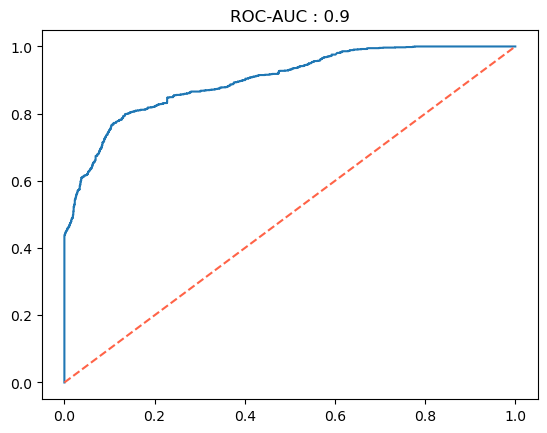

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [120]:
model_validation(VotingClassifier(estimators = base_model, voting = 'soft'), x_train, y_train, x_test, y_test)

In [121]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180
2,MultinomialNB(),0.717276,0.240833,0.739130,0.363294,0.237828
3,DecisionTreeClassifier(max_depth=5),0.838124,0.704167,0.789720,0.744493,0.626597
4,"DecisionTreeClassifier(max_depth=6, max_leaf_n...",0.831984,0.735000,0.756432,0.745562,0.620184
5,RandomForestClassifier(max_depth=8),0.850405,0.651667,0.868889,0.744762,0.641987
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.776444,0.504167,0.745993,0.601691,0.454273
7,"XGBClassifier(base_score=None, booster=None, c...",0.803517,0.739167,0.694053,0.715900,0.565957
8,"XGBClassifier(base_score=None, booster=None, c...",0.847893,0.705000,0.815815,0.756370,0.646651
9,"VotingClassifier(estimators=[('DT1', DecisionT...",0.848172,0.721667,0.804833,0.760984,0.650220


In [122]:
scores = cross_val_score(estimator = VotingClassifier(estimators = base_model, voting = 'soft'), X = x_train, y = y_train, scoring = 'f1', cv = 5)

In [123]:
scores

array([0.74730354, 0.57856029, 0.17547358, 0.65231608, 0.5255102 ])

### STACKING

[[2145  238]
 [ 372  828]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2383
           1       0.78      0.69      0.73      1200

    accuracy                           0.83      3583
   macro avg       0.81      0.80      0.80      3583
weighted avg       0.83      0.83      0.83      3583



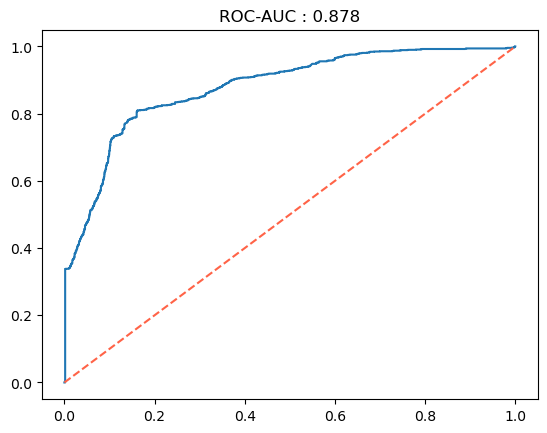

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [125]:
model_validation(StackingClassifier(estimators = base_model), x_train, y_train, x_test, y_test)

In [126]:
scorecard

,Model,Accuracy,Recall,Precision,F1 Score,Cohen-Kappa-Scorecard
0,LogisticRegression(class_weight='balanced'),0.718672,0.777500,0.557348,0.649269,0.424889
1,GaussianNB(),0.708066,0.629167,0.556785,0.590767,0.365180
2,MultinomialNB(),0.717276,0.240833,0.739130,0.363294,0.237828
3,DecisionTreeClassifier(max_depth=5),0.838124,0.704167,0.789720,0.744493,0.626597
4,"DecisionTreeClassifier(max_depth=6, max_leaf_n...",0.831984,0.735000,0.756432,0.745562,0.620184
5,RandomForestClassifier(max_depth=8),0.850405,0.651667,0.868889,0.744762,0.641987
6,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.776444,0.504167,0.745993,0.601691,0.454273
7,"XGBClassifier(base_score=None, booster=None, c...",0.803517,0.739167,0.694053,0.715900,0.565957
8,"XGBClassifier(base_score=None, booster=None, c...",0.847893,0.705000,0.815815,0.756370,0.646651
9,"VotingClassifier(estimators=[('DT1', DecisionT...",0.848172,0.721667,0.804833,0.760984,0.650220


In [127]:
scores = cross_val_score(estimator = StackingClassifier(estimators = base_model), X = x_train, y = y_train, scoring = 'f1', cv = 7)

In [128]:
scores

array([0.61911555, 0.78012313, 0.60667752, 0.12509091, 0.59220029,
       0.66168371, 0.37783833])

#### LETS TRY AND TUNE RANDOM FOREST

[[2026  357]
 [ 294  906]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2383
           1       0.72      0.76      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



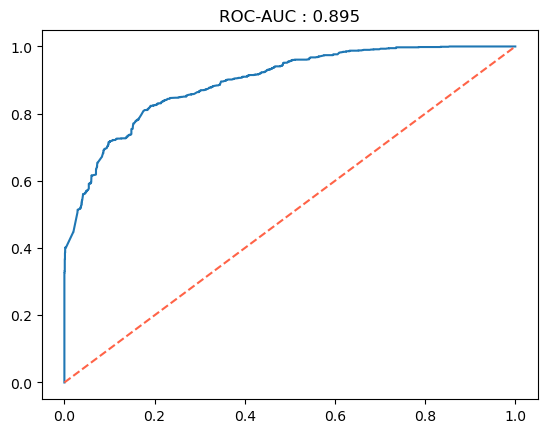

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) n


In [134]:
model_validation(RandomForestClassifier(n_estimators = 100,max_features = None, max_depth = 6, class_weight = 'balanced'), x_train,y_train,x_test,y_test)

In [136]:
cross_val_score(estimator=RandomForestClassifier(n_estimators = 100,max_features = None, max_depth = 5, class_weight = 'balanced'), X=x_train,y=y_train,cv = 7, scoring = 'f1')

array([0.72106136, 0.73363353, 0.6780198 , 0.32200557, 0.61538462,
       0.7223382 , 0.70963542])

In [138]:
cross_val_score(estimator=RandomForestClassifier(n_estimators = 100,max_features = None, max_depth = 5, class_weight = 'balanced'),
                X=x_train,y=y_train,cv = KFold(n_splits = 7, random_state = 2, shuffle = True), scoring = 'f1')

array([0.72359551, 0.73174541, 0.72497123, 0.7342631 , 0.73461959,
       0.75293255, 0.7255957 ])

#### **LETS CHECK DT AND XGB WITH KFOLDS**

In [148]:
cross_val_score(estimator=DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced'),
                X=x_train,y=y_train,cv = KFold(n_splits = 7, random_state = 2, shuffle = True), scoring = 'f1')

array([0.70188943, 0.70937042, 0.70819907, 0.72156013, 0.72196511,
       0.73803787, 0.69850321])

In [144]:
scores_xgb1 = cross_val_score(estimator=XGBClassifier(learning_rate = 0.1, max_depth = 5, class_weight = 'balanced'),
                X=x_train,y=y_train,cv = KFold(n_splits = 7, random_state = 2, shuffle = True), scoring = 'f1')

In [145]:
scores_xgb2 = cross_val_score(estimator=XGBClassifier(learning_rate = 0.05, max_depth = 5, class_weight = 'balanced'),
                X=x_train,y=y_train,cv = KFold(n_splits = 7, random_state = 2, shuffle = True), scoring = 'f1')

In [146]:
scores_xgb1.mean()

0.7941135210335076

In [147]:
scores_xgb2.mean()

0.7735888446547537

In [149]:
scores_xgb1.std()/scores_xgb1.mean()

0.014888529538956084

In [150]:
scores_xgb2.std()/scores_xgb2.mean()

0.018974424673496866

In [151]:
base_model = [('DT1', DecisionTreeClassifier(max_depth = 5)),
              ('DT2', DecisionTreeClassifier(max_depth = 6)),
             ('XGB1', XGBClassifier(n_estimators = 70, learning_rate = 0.1, max_depth = 5)),
             ('XGB2', XGBClassifier(n_estimators = 70, learning_rate = 0.05, max_depth = 5))]

[[2173  210]
 [ 334  866]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2383
           1       0.80      0.72      0.76      1200

    accuracy                           0.85      3583
   macro avg       0.84      0.82      0.82      3583
weighted avg       0.85      0.85      0.85      3583



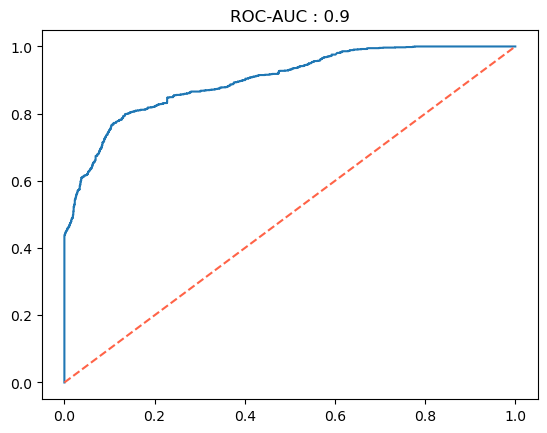

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [152]:
model_validation(VotingClassifier(estimators = base_model, voting = 'soft'), x_train, y_train, x_test, y_test)

In [155]:
score_vot = cross_val_score(estimator=VotingClassifier(estimators = base_model, voting = 'soft'), X = x_train, y= y_train, scoring = 'f1', 
                            cv = KFold(n_splits = 7, random_state = 2, shuffle = True))

In [156]:
score_vot

array([0.74682991, 0.74900044, 0.74544647, 0.74726201, 0.7697479 ,
       0.76293103, 0.73698384])

In [157]:
score_vot.mean()

0.751171657338278

In [158]:
score_vot.std()/score_vot.mean()

0.013837373102571122

In [159]:
score_stac = cross_val_score(estimator=StackingClassifier(estimators = base_model), X = x_train, y= y_train, scoring = 'f1', 
                            cv = KFold(n_splits = 7, random_state = 2, shuffle = True))

In [160]:
score_stac

array([0.68940427, 0.68278805, 0.70483005, 0.65805261, 0.69710669,
       0.71358135, 0.65853659])

In [161]:
score_stac.mean()

0.6863285166620512

In [162]:
score_stac.std()/score_stac.mean()

0.029115089703324624

### **LETS FINALISE XGB1 AND FINE TUNE IT**

In [167]:
grid = {'n_estimators' : [70,80],
        'learning_rate' : [0.1,0.7,0.5],
        'max_depth' : [6,7,8,9]}

In [168]:
gscv = GridSearchCV(estimator = XGBClassifier(), param_grid = grid, cv = KFold(n_splits=7, shuffle = True, random_state = 2), scoring = 'f1', verbose = 2)

In [169]:
gscv.fit(x_train, y_train)

Fitting 7 folds for each of 24 candidates, totalling 168 fits
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=70; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=80; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=80; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=80; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_estimators=80; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=6, n_

GridSearchCV(cv=KFold(n_splits=7, random_state=2, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.7, 0.5],
                         'max_depth': [6, 7, 8, 9], 'n_estimators': [70, 80]},
             scoring='f1', verbose=2)

In [170]:
gscv.best_params_

{'learning_rate': 0.7, 'max_depth': 9, 'n_estimators': 70}

[[1784  599]
 [ 286  914]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      2383
           1       0.60      0.76      0.67      1200

    accuracy                           0.75      3583
   macro avg       0.73      0.76      0.74      3583
weighted avg       0.78      0.75      0.76      3583



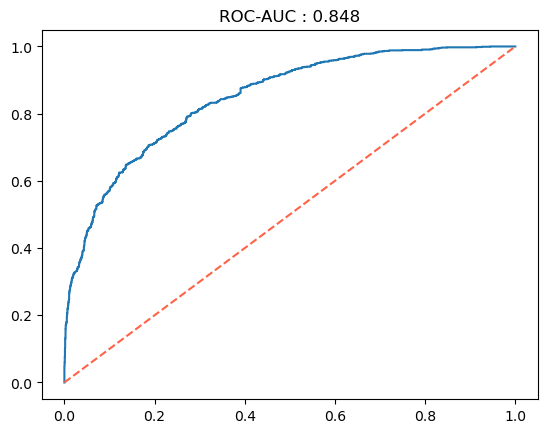

DO YOU WANT TO SAVE THIS MODEL ? (Y/N) y


In [172]:
model_validation(XGBClassifier(**gscv.best_params_), x_train, y_train, x_test, y_test)

In [173]:
cross_val_score(estimator=XGBClassifier(**gscv.best_params_),
                X=x_train,y=y_train,cv = KFold(n_splits = 7, random_state = 2, shuffle = True), scoring = 'roc_auc')

array([0.95209557, 0.9508215 , 0.94998466, 0.94826129, 0.95775628,
       0.95573433, 0.94813706])

## **BUSINESS INTERPRETATION**

In [204]:
fi_data = pd.DataFrame(final_model.feature_importances_, index = x_train.columns).sort_values(by = 0, ascending = False)

In [205]:
fi_data

,0
market_segment_type,0.266787
required_car_parking_space,0.250742
no_of_special_requests,0.161692
lead_time,0.073017
no_of_adults,0.055659
arrival_month,0.047230
avg_price_per_room,0.042388
no_of_weekend_nights,0.030352
no_of_week_nights,0.027931
arrival_day,0.023337


<Axes: >

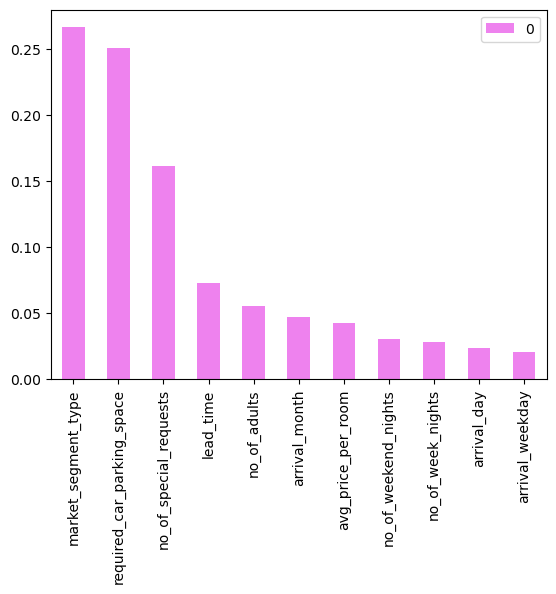

In [207]:
fi_data.plot(kind = 'bar', color = 'violet')

## DEPLOYMENT

In [175]:
final_model = XGBClassifier(**gscv.best_params_)
final_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [196]:
lt = 7
st = 1
spcl =0
price = 150
adults = 2
wkend= 2
park = 0
wk = 0
month = 11
day = 10
weekd = 5

In [197]:
tran_data = pt.transform([[lt,price]])
lt_t = tran_data[0][0]
price_t = tran_data[0][1]

In [198]:
price_t

93.12772243246981

In [199]:
final_model.predict([[lt_t, st,spcl, price_t, adults, wkend, park, wk, month, day, weekd]])

array([0])

In [200]:
final_model.predict_proba([[lt_t, st,spcl, price_t, adults, wkend, park, wk, month, day, weekd]])[:,1]

array([0.00176986], dtype=float32)

In [208]:
# LET'S SAVE THE FITTED MODEL AND TRANSFORMER INSTANCE

import pickle

In [209]:
with open('final_model_xgb.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [210]:
with open ('transformer.pkl', 'wb') as file:
    pickle.dump(pt, file)